In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm,Normalize
import seaborn as sns
from matplotlib import rc

In [2]:
# activate latex text rendering
#rc('text', usetex=True)
plt.rcParams["text.usetex"] = False

In [3]:
! pwd

/Volumes/HDD750GB/Programs/Fisher/github


In [4]:
# This function extracts the outlier points (the red points) from the z catalogue. 
def outlier_points(zp,zs):
        tmp_x      = np.where( (zp > float(0.300)) & (zp < float(3.0)) )[0]
        tmp_ztrue  = zs[tmp_x]
        tmp_z_phot  = zp[tmp_x]
        tmp_dz     = ( tmp_ztrue - tmp_z_phot ) / ( 1.0 + tmp_z_phot )
        q75, q25   = np.percentile( tmp_dz, [75 ,25]) # COR IQR
        sigma      = ( q75 - q25 ) / float(1.349)
        threesigma = float(3.0) * sigma
        ox = np.where( ( np.fabs( tmp_dz ) > float(0.0600) ) & ( np.fabs( tmp_dz ) > threesigma ) )[0]
        tmp_z_phot1=[];tmp_z_true1=[];
        for i in range(len(ox)):
            tmp_z_phot1.append(tmp_z_phot.iloc[ox[i]])
            tmp_z_true1.append(tmp_ztrue.iloc[ox[i]])
        zp = pd.DataFrame(tmp_z_phot1)
        zs = pd.DataFrame(tmp_z_true1)  
        zt = pd.concat([zp,zs],axis=1)
        zt.columns = ['zphoto','zspec']
        return zt

## Extracting the photoz and spectro_z from the catalogue, for tzpz plot
### In the block below, $3$ files will be produced. $2$ from the grey points and $1$ from the red points. The grey points : 1 File with all the points as it is from the catalogue, 1 File with $|COR\_val| >1.5$ removed. These files are named in the format : <font color='red'>tzpz_[main or out]_[suffix]</font> . suffix = 'COR' means, the file with $|COR\_val| >1.5$ removed, similarly 'main' stands for grey points and 'out' stands for red points.

In [5]:
aa = pd.read_csv('CMNN_Photoz_Estimator-master/output/run_big_sample/zphot.cat',sep=r"\s+")# photoz catalogue

In [6]:
f = pd.read_csv('interpolated_fout_new3.csv',sep=' ' ) # output file from program, we will compare with this

In [7]:
# Extracting the z_photo and z_spectra column form the zphoto catalogue
index=range(0,len(aa.iloc[:, 1]))
index

columns=['z_true','z_phot']
bb = pd.DataFrame(index=index, columns=columns)

bb['z_true']=aa.iloc[:, 1]
bb['z_phot']=aa.iloc[:, 2]

bb = bb.sort_values('z_true')   

# Grey points
# With COR>1.5 removed
tzpz_main_points = bb
tzpz_main_points['COR_val'] = tzpz_main_points.z_true- tzpz_main_points.z_phot
#pd.DataFrame(tzpz_main_points[(abs(tzpz_main_points.COR_val) < abs(1.5))]).to_csv('tzpz_plotting/tzpz_plotting_data_COR_gray.csv',index=False,sep=' ')
#---------------------

#bb.to_csv('tzpz_plotting/tzpz_plotting_data_gray.csv',index=False,sep=' ') # With all points
#---------------------

# Red points
# COR>1.5 not removed
tzpz_out = outlier_points(bb['z_phot'],bb['z_true'])
tzpz_out = tzpz_out.sort_values('zspec')  
#tzpz_out.to_csv('tzpz_plotting/tzpz_plotting_data_red.csv',sep=' ',index=False)

In [8]:
tzpz_out # Red Points

,zphoto,zspec
1620,0.252435,0.014823
3145,2.221695,0.023857
946,2.504867,0.053968
3587,0.226088,0.054330
2257,2.392700,0.056605
...,...,...
1171,2.763761,3.051552
2624,2.783590,3.060091
857,0.388392,3.061933
123,2.773921,3.095821


In [9]:
tmp1 = (bb.z_true - bb.z_phot)
tmp1.describe()

count    90000.000000
mean         0.001991
std          0.169196
min         -2.902645
25%         -0.018340
50%          0.000883
75%          0.021222
max          2.769703
dtype: float64

In [10]:
#bb = bb.drop(bb[bb.z_true > 1.201].index)

### <font color='blue'>Plotting</font> 

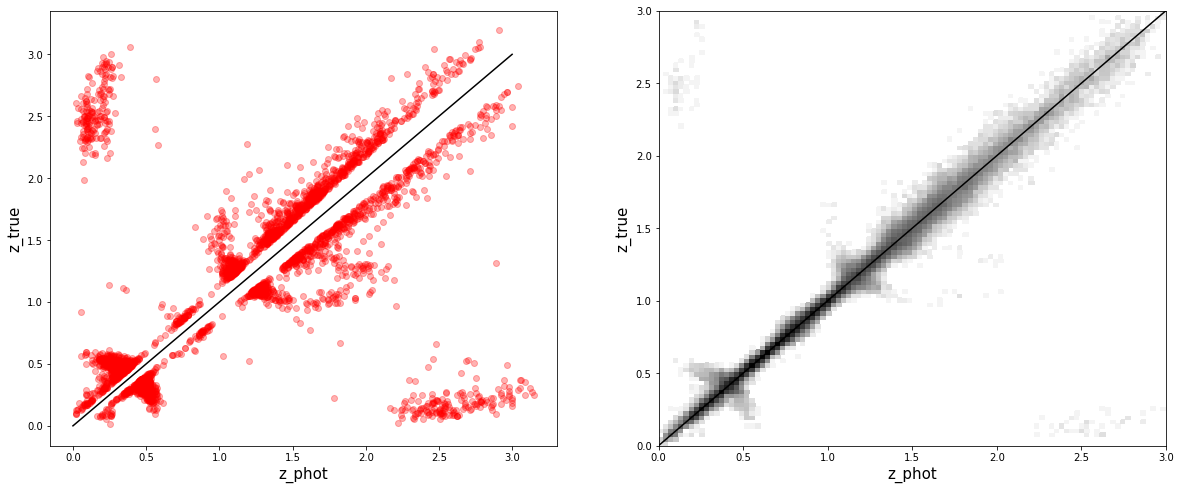

In [11]:
plt.rcParams['figure.figsize'] = [20,8] 
plt.subplot(1,2,1)
tx = np.where( bb.z_phot > 0.0 )[0]
#plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
 #           cmin=1, cmap='Greys');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)
plt.plot(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.3,c='r')
plt.plot([0.0,3.0],[0.0,3.0],color='black')
#plt.axhline(0.1)
#plt.axvline(1.2)

plt.subplot(1,2,2)
tx = np.where( bb.z_phot > 0.0 )[0]
#plt.rcParams['figure.figsize'] = [10,8] 
plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greys');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)

plt.plot([0.0,3.0],[0.0,3.0],color='black')
#plt.axhline(0.1)
#plt.axvline(1.2)

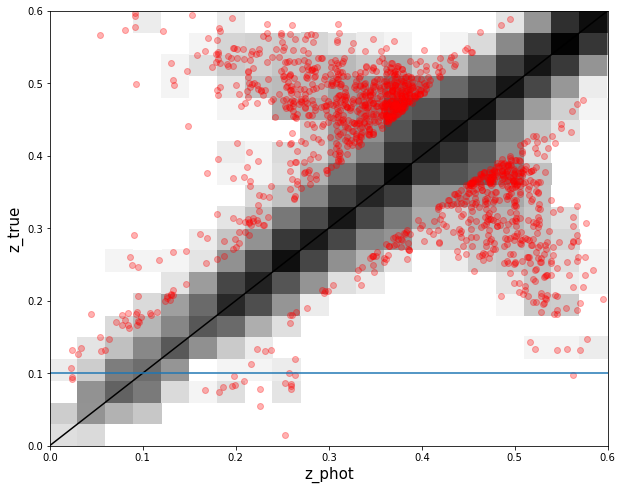

In [12]:
tx = np.where( bb.z_phot > 0.0 )[0]
plt.rcParams['figure.figsize'] = [10,8] 
plt.hist2d( bb.z_phot[tx], bb.z_true[tx], bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greys');
plt.xlabel('z_phot',fontsize=15);plt.ylabel('z_true',fontsize=15)
plt.plot(outlier_points(bb['z_phot'],bb['z_true']).zphoto,outlier_points(bb['z_phot'],bb['z_true']).zspec,'o',
         alpha=0.3,c='r')
plt.plot([0.0,3.0],[0.0,3.0],color='black')
plt.xlim(0.,0.6)
plt.ylim(0.0,0.6)
plt.axhline(0.1)

### Binning the data to compute the mean redshifts per bin and the no. of candidates
### This is for the $\color{grey}{\text{Grey}}$ points

In [13]:
# Binning the data to compute the mean redshifts per bin and the no. of candidates
bins = np.linspace(0,3.3,34)
label = np.linspace(0.05,3.25,33)
print('Total Number of Points ',len(bb))

# Calling the 'tzpz_main_points' file and extracting pts < 1.5 COR
bb = tzpz_main_points[(abs(tzpz_main_points.COR_val) < abs(1.5))]
bb = bb.drop(['COR_val'],axis=1)

#print(len(tzpz_out2))
print('No. after  removal of points',len(bb))
bb['bin_z'] = pd.cut(bb.z_true, bins=bins)#, labels=label)

N = pd.DataFrame(bb.groupby(pd.cut(bb.z_true, bins=bins,labels=label)).count()).z_true
N = pd.DataFrame(np.array(N))
N.columns = ['N']
N.reset_index(drop=True, inplace=True)

tzpz_main = bb.groupby(pd.cut(bb.z_true, bins=bins,labels=label)).mean()
tzpz_main.columns = ['z_true_mean','z_phot_mean']
tzpz_main.reset_index(drop=True, inplace=True)
#tzpz_main_points = tzpz_main
tzpz_main =  pd.concat([tzpz_main,N],axis=1,ignore_index=True)
tzpz_main =  pd.concat([tzpz_main,pd.DataFrame(label)],axis=1,ignore_index=True)
tzpz_main.columns = ['z_true_mean','z_phot_mean','N','Bin']
tzpz_main = tzpz_main[['Bin','N','z_true_mean','z_phot_mean']]
tzpz_main = tzpz_main.iloc[0:12 , : ]
#tzpz_main = tzpz_main.sort_values('z_true_mean')  

Total Number of Points  90000
No. after  removal of points 89621


In [14]:
tzpz_main

,Bin,N,z_true_mean,z_phot_mean
0,0.05,510,0.076863,0.085455
1,0.15,1417,0.163771,0.169205
2,0.25,5062,0.252976,0.259735
3,0.35,6087,0.353510,0.362201
4,0.45,7043,0.450704,0.435872
5,0.55,6672,0.551808,0.542557
6,0.65,6908,0.647815,0.647109
7,0.75,7782,0.750480,0.753455
8,0.85,6535,0.848409,0.845089
9,0.95,6103,0.947165,0.946239


Text(0.5, 1.0, 'Plot of COR_Values of the Grey Points')

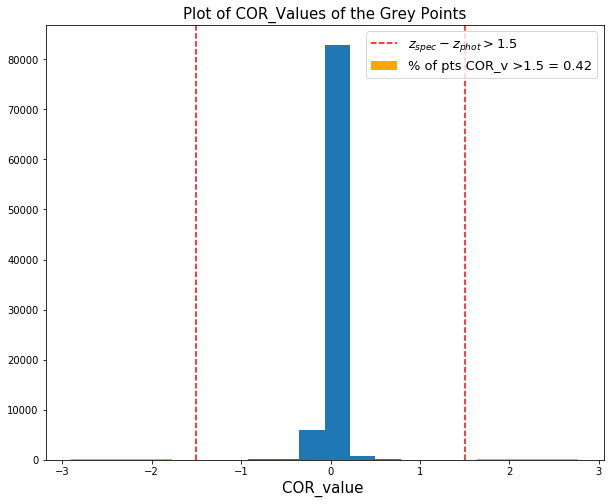

In [15]:
plt.rcParams['figure.figsize'] = [10,8] 
plt.hist(tzpz_main_points.z_true-tzpz_main_points.z_phot,bins=20)
plt.hist(tzpz_main_points[(abs(tzpz_main_points.COR_val) > 1.5)].COR_val,bins=10,
         color='orange',label ='%% of pts COR_v >1.5 = %.2f'
         %(len((tzpz_main_points[(abs(tzpz_main_points.COR_val) > 1.5)].COR_val))/len(tzpz_main_points.z_true-tzpz_main_points.z_phot)*100 ))
#sns.kdeplot(tzpz_main.zspec-tzpz_main.zphoto, bw=0.5)
#sns.kdeplot(w.COR_value, bw=0.5)
plt.axvline(1.5,linestyle = '--',c='r');plt.axvline(-1.5,linestyle = '--',c='r',label='$z_{spec}-z_{phot}>1.5$')
plt.legend(fontsize=13)
plt.xlabel('COR_value ',fontsize='15')
plt.title('Plot of COR_Values of the Grey Points',c='black',fontsize='15')
#plt.text(0.5,800.4,'The red vertical margins shows how \n many points have \n$\\bf{COR_{value} > 1.5}$ on both sides.'
         #,fontsize=12,c='black')

### This is for the outlier points ( $\color{red}{\text{Red}}$ Points)

#### Making a new column : with COR_Value

In [16]:
tzpz_out['COR_val'] = tzpz_out.zspec-tzpz_out.zphoto

Text(0.5, 800.4, 'The red vertical margins shows how \n many points have \n$\\bf{COR_{value} > 1.5}$ on both sides.')

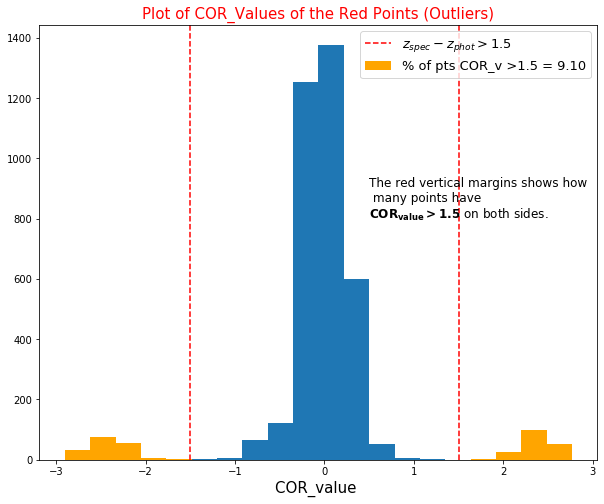

In [17]:
plt.rcParams['figure.figsize'] = [10,8] 
plt.hist(tzpz_out.zspec-tzpz_out.zphoto,bins=20)
plt.hist(tzpz_out[(abs(tzpz_out.COR_val) > 1.5)].COR_val,bins=20,
         color='orange',label ='%% of pts COR_v >1.5 = %.2f'
         %(len((tzpz_out[(abs(tzpz_out.COR_val) > 1.5)].COR_val))/len(tzpz_out.zspec-tzpz_out.zphoto)*100 ))
#sns.kdeplot(tzpz_out.zspec-tzpz_out.zphoto, bw=0.5)
#sns.kdeplot(w.COR_value, bw=0.5)
plt.axvline(1.5,linestyle = '--',c='r');plt.axvline(-1.5,linestyle = '--',c='r',label='$z_{spec}-z_{phot}>1.5$')
plt.legend(fontsize=13)
plt.xlabel('COR_value ',fontsize='15')
plt.title('Plot of COR_Values of the Red Points (Outliers)',c='red',fontsize='15')
plt.text(0.5,800.4,'The red vertical margins shows how \n many points have \n$\\bf{COR_{value} > 1.5}$ on both sides.'
         ,fontsize=12,c='black')

### Extracting points which has $|COR\_VALUE|<1.5$ The Output file will be named :
## <font color='red'>'tzpz_out_COR'</font> 

In [18]:
print('No. before removal of points',len(tzpz_out))
tzpz_out2 = tzpz_out[(tzpz_out.COR_val < 1.5)]
#print(len(tzpz_out2))
print('No. after  removal of points',len(tzpz_out2[(tzpz_out2.COR_val > -1.5)]))
tzpz_out_COR = tzpz_out2[(tzpz_out2.COR_val > -1.5)]
xx=((len(tzpz_out)-len(tzpz_out2[(tzpz_out2.COR_val > -1.5)]))/len(tzpz_out))*100.
print('%% of dropped pts %.2f'%(xx))

No. before removal of points 3826
No. after  removal of points 3478
% of dropped pts 9.10


In [19]:
#tzpz_out_COR.to_csv('tzpz_plotting/tzpz_plotting_data_COR_red.csv',sep=' ',index=False)
tzpz_out_COR

,zphoto,zspec,COR_val
1620,0.252435,0.014823,-0.237612
3587,0.226088,0.054330,-0.171758
462,0.181479,0.074497,-0.106982
193,0.166868,0.076064,-0.090804
2721,0.226575,0.077523,-0.149052
...,...,...,...
2307,2.466699,3.040638,0.573939
1171,2.763761,3.051552,0.287791
2624,2.783590,3.060091,0.276501
123,2.773921,3.095821,0.321900


In [20]:
print('Min COR value now ',np.min(tzpz_out_COR.COR_val))
print('Max COR value now ',np.max(tzpz_out_COR.COR_val))

Min COR value now  -1.242432
Max COR value now  1.0851689999999998


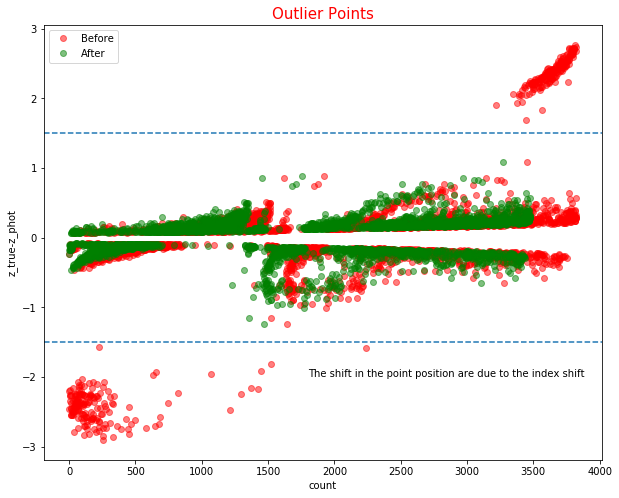

In [21]:
plt.plot( np.linspace(1,len(tzpz_out),len(tzpz_out)) , tzpz_out.zspec - tzpz_out.zphoto,'o',alpha=0.5,c='r',label='Before')
plt.plot( np.linspace(1,len(tzpz_out_COR),len(tzpz_out_COR)) , 
         tzpz_out_COR.zspec - tzpz_out_COR.zphoto,'o',alpha=0.5,c='g',label='After')
plt.axhline(1.5,linestyle='--')
plt.axhline(-1.5,linestyle='--')
plt.ylabel('z_true-z_phot')
plt.xlabel('count')
plt.title('Outlier Points',c='r',fontsize=15)
plt.text(1800,-2,'The shift in the point position are due to the index shift')
plt.legend()

### Bin Code

In [22]:
bins = np.linspace(0,3.3,34)
label = np.linspace(0.05,3.25,33)
tzpz_out_COR['bin_z'] = pd.cut(tzpz_out_COR.zspec, bins=bins)#, labels=label)

N = pd.DataFrame(tzpz_out_COR.groupby(pd.cut(tzpz_out_COR.zspec, bins=bins,labels=label)).count()).zspec
N = pd.DataFrame(np.array(N))
N.columns = ['N']
N.reset_index(drop=True, inplace=True)
tzpz_out_COR = tzpz_out_COR.drop(['COR_val'],axis=1)

tzpz_outt = tzpz_out_COR.groupby(pd.cut(tzpz_out_COR.zspec, bins=bins,labels=label)).mean()
tzpz_outt.columns = ['z_true_mean','z_phot_mean']
tzpz_outt.reset_index(drop=True, inplace=True)
tzpz_outt =  pd.concat([tzpz_outt,N],axis=1,ignore_index=True)
tzpz_outt =  pd.concat([tzpz_outt,pd.DataFrame(label)],axis=1,ignore_index=True)
tzpz_outt.columns = ['z_true_mean','z_phot_mean','N','Bin']
tzpz_outt = tzpz_outt[['Bin','N','z_true_mean','z_phot_mean']]
tzpz_outt = tzpz_outt.iloc[0:12 , :]
#tzpz_outt = tzpz_outt.sort_values('z_true_mean')  

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
tzpz_outt['f_out'] = tzpz_outt.N/(tzpz_main.N)

In [24]:
tzpz_outt

,Bin,N,z_true_mean,z_phot_mean,f_out
0,0.05,18,0.219213,0.080078,0.035294
1,0.15,55,0.265172,0.163151,0.038814
2,0.25,203,0.422421,0.260562,0.040103
3,0.35,340,0.440004,0.352839,0.055857
4,0.45,494,0.340796,0.465696,0.070141
5,0.55,237,0.318647,0.530775,0.035522
6,0.65,12,0.777474,0.651017,0.001737
7,0.75,35,0.869637,0.754731,0.004498
8,0.85,55,0.787105,0.855449,0.008416
9,0.95,43,1.208204,0.962008,0.007046


In [25]:
test = pd.concat([tzpz_main,tzpz_outt.iloc[: , 1:]],axis=1)
test.columns = ['Bin','N_G','z_true_mean_G','z_phot_mean_G','N_R','z_true_mean_R','z_phot_mean_R','fout']

In [26]:
test['COR_Outlier_Bias'] = (test.z_true_mean_R - test.z_phot_mean_R)/(1+test.z_phot_mean_R)

### We combine the two files. We identify the gray points with 'G' and red (outlier points) with 'R'. 
#### N = No. of Points in that bin

In [27]:
test

,Bin,N_G,z_true_mean_G,z_phot_mean_G,N_R,z_true_mean_R,z_phot_mean_R,fout,COR_Outlier_Bias
0,0.05,510,0.076863,0.085455,18,0.219213,0.080078,0.035294,0.128819
1,0.15,1417,0.163771,0.169205,55,0.265172,0.163151,0.038814,0.087711
2,0.25,5062,0.252976,0.259735,203,0.422421,0.260562,0.040103,0.128402
3,0.35,6087,0.353510,0.362201,340,0.440004,0.352839,0.055857,0.064431
4,0.45,7043,0.450704,0.435872,494,0.340796,0.465696,0.070141,-0.085216
5,0.55,6672,0.551808,0.542557,237,0.318647,0.530775,0.035522,-0.138576
6,0.65,6908,0.647815,0.647109,12,0.777474,0.651017,0.001737,0.076593
7,0.75,7782,0.750480,0.753455,35,0.869637,0.754731,0.004498,0.065483
8,0.85,6535,0.848409,0.845089,55,0.787105,0.855449,0.008416,-0.036834
9,0.95,6103,0.947165,0.946239,43,1.208204,0.962008,0.007046,0.125482


In [28]:
#test.to_csv('tzpz_plotting/tzpz_bin_data.csv',sep=' ',index=False)

### Comparing to the data file from the program

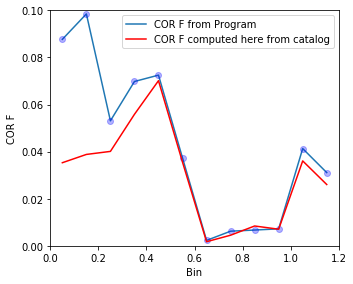

In [29]:
plt.rcParams['figure.figsize'] = [5,4]

plt.plot(f.z_true,f.F,label='COR F from Program')
plt.plot(f.z_true,f.F,'o',alpha=0.3,c='b',label='_nolegend_')

plt.xlabel('Bin')
plt.ylabel('COR F')
plt.tight_layout()

plt.plot(tzpz_outt.Bin,tzpz_outt.N/(tzpz_main.N),c='r',label = 'COR F computed here from catalog')
plt.xlim(0,1.2)
plt.ylim(0,0.1)
plt.legend()

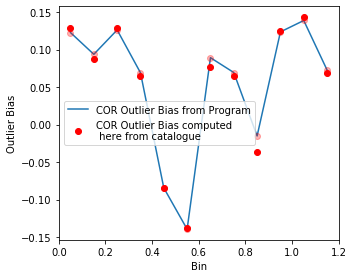

In [30]:
outlier_bias = (tzpz_outt.z_true_mean - tzpz_outt.z_phot_mean)/(1+tzpz_outt.z_phot_mean)
plt.rcParams['figure.figsize'] = [5,4]

plt.plot(f.z_true,(f.outlier_bias),label='COR Outlier Bias from Program')
plt.plot(f.z_true,(f.outlier_bias),'o',alpha=0.3,c='r',label='_nolegend_')
#plt.plot(f.z_true,(f.z_true-f.z_photo)/(1+f.z_photo),'o',alpha=0.3,c='r',label='_nolegend_')

plt.xlabel('Bin')
plt.ylabel('Outlier Bias')
plt.tight_layout()

plt.plot(tzpz_outt.Bin,test.COR_Outlier_Bias,'o',c='r',label='COR Outlier Bias computed \n here from catalogue')
plt.xlim(0,1.2)
#plt.ylim(0,1.2)
plt.legend()

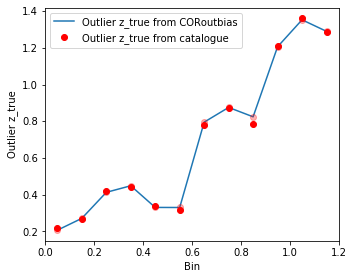

In [32]:
plt.rcParams['figure.figsize'] = [5,4]

plt.plot(f.z_true,(f.outlier_bias*(1+f.z_photo))+f.z_photo,label='Outlier z_true from CORoutbias')
plt.plot(f.z_true,(f.outlier_bias*(1+f.z_photo))+f.z_photo,'o',alpha=0.3,c='r',label='_nolegend_')
#plt.plot(f.z_true,(f.z_true-f.z_photo)/(1+f.z_photo),'o',alpha=0.3,c='r',label='_nolegend_')

plt.xlabel('Bin')
plt.ylabel('Outlier z_true')
plt.tight_layout()

plt.plot(tzpz_outt.Bin,tzpz_outt.z_true_mean,'o',c='r',label='Outlier z_true from catalogue')
plt.xlim(0,1.2)
#plt.ylim(0,1.2)
plt.legend()

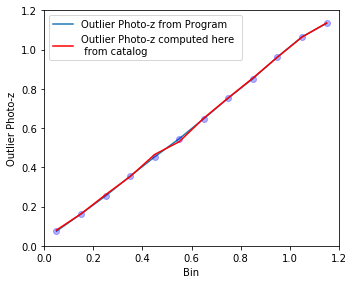

In [31]:
plt.rcParams['figure.figsize'] = [5,4]

plt.plot(f.z_true,f.z_photo,label='Outlier Photo-z from Program')
plt.plot(f.z_true,f.z_photo,'o',alpha=0.3,c='b',label='_nolegend_')

plt.xlabel('Bin')
plt.ylabel('Outlier Photo-z')
plt.tight_layout()

plt.plot(tzpz_outt.Bin,tzpz_outt.z_phot_mean,c='r',label='Outlier Photo-z computed here \n from catalog')
plt.xlim(0,1.2)
plt.ylim(0,1.2)
plt.legend()

# ------------ Not Needed --------------
# From the file produced in code

In [33]:
main = pd.read_csv('CMNN_Photoz_Estimator-master/output/run_1/analysis/tzpz_main.csv',sep=' ')
out = pd.read_csv('CMNN_Photoz_Estimator-master/output/run_1/analysis/tzpz_out.csv',sep=' ')

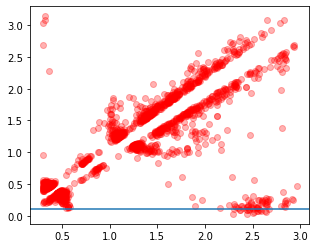

In [34]:
#plt.plot(main['zphot'],main['zspec'],'o',c='gray')
plt.plot(out['zphot'],out['zspec'],'o',c='red',alpha=0.3)
plt.axhline(0.1)